In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Background

The Queen of the East, that was people talk of Jakarta due to many warehouses filled with spices that back then it is as valuable as gold. Now, it is known as the capital city and the center of economic, cultural and politics of Indonesia. 

At the moment Jakarta is facing two major problem, traffic and polution. The Guardian Newspaper says that Jakarta is have the worst traffic in the world. At average people would spend 10 years of their life in traffic. Other than that, In the meantime, the Air Quality Index of Jakarta is 156 or 13.2 times more than the World Health Organization standards.

To tackle those problems the local government proposed Transjakarta in 2004. Transjakarta is a Bus Rapid System (BRT) transportation system with as of today April 2023 have a total route length of 251,2 km making it the world longest route in the world. With a mission of facilitate its customer to commute in their beloved city it is also hope it can improve the air quality index. 

Transjakarta offer their customer with a comfort transportation in fair price ranging between 2000 - 3500 rupiah or you can upgrade to Royaltrans at 20000 rupiah. Transjakarta have a target of 1 million customer per day, its not an easy task so they need to pull every string they have to achieve that. 

To increase their customer one of the way is to know their customer better. By knowing their customers they can facilitate their customer best on what they need. Maybe they dont want a cheap price, they want faster way to commute. In this analysis we're going to dig in onto Transjakarta customer in the month of April 2023.

# Problem Statement

Stated by CNBC, Transjakarta have a target to serve 1,5 million of customer perday in 2023. To attract customer, Transjakarta need to know better about their customer and create a program that could reach their customer.

# Load Dataset

In [2]:
df = pd.read_csv('Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

# Data Understanding

## Data Dictionary

1.    transID: Unique transaction id for every transaction
2.    payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.    payCardBank: Customers card bank issuer name
4.    payCardName: Customers name that is embedded in the card.
5.    payCardSex: Customers sex that is embedded in the card
8.    payCardBirthDate: Customers birth year
9.    corridorID: Corridor ID / Route ID as key for route grouping.
10.    corridorName: Corridor Name / Route Name contains Start and Finish for each route.
11.    direction: 0 for Go, 1 for Back. Direction of the route.
12.    tapInStops: Tap In (entrance) Stops ID for identifying stops name
13.    tapInStopsName: Tap In (entrance) Stops Name where customers tap in
14.    tapInStopsLat: Latitude of Tap In Stops
15.    tapInStopsLon: Longitude of Tap In Stops
16.    stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
17.    tapInTime: Time of tap in. Date and time
18.    tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
19.    tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
20.    tapOutStopsLat: Latitude of Tap Out Stops
21.    tapOutStopsLon: Longitude of Tap Out Stops
22.    stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
23.    tapOutTime: Time of tap out. Date and time
24.    payAmount: The number of what customers pay. Some are free. Some not.

## Descriptive Analytic

In [4]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


## Missing Value

In [5]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = df_null['Missing Value'] / len(df) * 100
df_null['% Total Missing Value'] = df_null['% Total Missing Value'].round(2)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.00
1,payCardID,0,0.00
2,payCardBank,0,0.00
3,payCardName,0,0.00
4,payCardSex,0,0.00
5,payCardBirthDate,0,0.00
6,corridorID,1257,3.32
7,corridorName,1930,5.09
8,direction,0,0.00
9,tapInStops,1213,3.20


- Transjakarta dataset have 22 column and 379000 rows
- "CorridorID", "CorridorName", "tapinStops", "tapOutStops", "tapOutStopsName", "tapOutStopsLat", "tapOutStopsLon", "stopEndSeq","stopEndSeq", "tapOutTime", and "payAmount" have missing value.
- payAmount have a minimum value of 0 while Transjakarta doesn't have any free ride

Handle missing value: 
- Fill in missing value based on other column or from outside information. For instance the ID column such as corridorID, tapInStops, tapOutStops can be filled by finding a match in the dataset by column name, and latitude and longitude.
- Fill in missing value from other source like change or fill payAmount based on the real price.
- Drop the the missing value.

# Data Preparation

## Change to date type

tapInTime and tapOutTime have object data type so we need to transform it to datetime.

In [6]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

## Fill in missing value

Combine the latitude and longitude of each stops to be use to filled in missing value

In [7]:
df['tapInLatLon'] = df['tapInStopsLat'].astype(str) + ',' + df['tapInStopsLon'].astype(str)

In [8]:
df['tapOutLatLon'] = df['tapOutStopsLat'].astype(str) + ',' + df['tapOutStopsLon'].astype(str)

### Fill in corridorID based on the corridorName

corridorID is a unique value of each Transjakarta coridor. To fill the missing value we need can find the corridor ID and the name that may appear in the dataset

In [9]:
corr_name_to_ID = df[['corridorName','corridorID']]
corr_name_to_ID.drop_duplicates(inplace=True)
corr_name_to_ID.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13316\116431177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_name_to_ID.drop_duplicates(inplace=True)


,corridorName,corridorID
0,Matraman Baru - Ancol,5
1,Stasiun Tebet - Karet via Patra Kuningan,6C
2,Pantai Maju - Kota,R1A
3,Pulo Gebang - Pulo Gadung 2 via PIK,11D
4,Tanjung Priok - Pluit,12


In [10]:
corr_name_to_ID = corr_name_to_ID[~corr_name_to_ID['corridorName'].isna()]
corr_name_to_ID = corr_name_to_ID[~corr_name_to_ID['corridorID'].isna()]
corr_name_to_ID

,corridorName,corridorID
0,Matraman Baru - Ancol,5
1,Stasiun Tebet - Karet via Patra Kuningan,6C
2,Pantai Maju - Kota,R1A
3,Pulo Gebang - Pulo Gadung 2 via PIK,11D
4,Tanjung Priok - Pluit,12
...,...,...
32124,Senen - Tanah Abang,1R
32159,Kampung Rambutan - Blok M,7B
32201,Matraman Baru - Ancol,M5
32251,Term. Pulo Gadung - Lampiri,JAK.99


In [11]:
dict_cor_name_ID = corr_name_to_ID.set_index('corridorName')['corridorID'].to_dict()

In [12]:
def fill_corridor_id(x):
    corridor_name = x['corridorName']
    corridor_id = x['corridorID']

    if isinstance(corridor_id, list):
        for id in corridor_id:
            if id == '':
                return dict_cor_name_ID.get(corridor_name, None)
            else:
                return id
    else:
        if pd.isnull(corridor_id):
            return dict_cor_name_ID.get(corridor_name, None)
        else:
            return corridor_id

df['corridorID'] = df.apply(fill_corridor_id, axis=1)


In [13]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInLatLon            0
tapOutLatLon           0
dtype: int64

By using the corridor name we only filled 32 out of 1257 missing value. It appears that because name also have missing value its not completely fillin the ID.

#### Fill in CorridorID based on latlong

Each corridorID may have several stops location. Because of that we can try to find the corridor ID based on their stops latitude and longitude. 

In [14]:
id_lat_long = df[['corridorID','tapInLatLon']].drop_duplicates()
id_lat_long = id_lat_long[~id_lat_long['corridorID'].isna()]

len(id_lat_long)

3663

In [15]:
dict_id_lat_long = id_lat_long.set_index('tapInLatLon')['corridorID'].to_dict()

In [16]:
def fill_corridor_id(x):
    corridor_latlon = x['tapInLatLon']
    corridor_id = x['corridorID']

    if isinstance(corridor_id, list):
        for id in corridor_id:
            if id == '':
                return dict_id_lat_long.get(corridor_latlon, None)
            else:
                return id
    else:
        if pd.isnull(corridor_id):
            return dict_id_lat_long.get(corridor_latlon, None)
        else:
            return corridor_id

df['corridorID'] = df.apply(fill_corridor_id, axis=1)


In [17]:
df['corridorID'].head()

0      5
1     6C
2    R1A
3    11D
4     12
Name: corridorID, dtype: object

In [18]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInLatLon            0
tapOutLatLon           0
dtype: int64

Based on the latitude and longitude we can filled in 1202 missing value and left us with 33 more.

In [19]:
df[df['corridorID'].isna()][['corridorID','corridorName','tapInStopsLat','tapInStopsLon','tapOutStops','tapOutStopsLat', 'tapOutStopsLon']].head()

,corridorID,corridorName,tapInStopsLat,tapInStopsLon,tapOutStops,tapOutStopsLat,tapOutStopsLon
32188,None,NaN,-6.128770,106.84083,B05999P,-6.129200,106.83856
32216,None,NaN,-6.340340,106.87371,B03996P,-6.347390,106.88437
32304,None,NaN,-6.179851,106.86080,B05443P,-6.185997,106.85083
32343,None,NaN,-6.242012,106.84064,B01449P,-6.251998,106.84266
32461,None,NaN,-6.246775,106.90827,B06177P,-6.248386,106.91713


The rest of the missing value in corridor ID, is a unique value therefore we cant fill it anymore.

### Fill in Corridor Name based on corridorID

After we filled the corridorID now we can fill in the name based on the ID

In [20]:
corr_id_to_name = df[['corridorID','corridorName']]
corr_id_to_name.drop_duplicates(inplace=True)
corr_id_to_name.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13316\4094232533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_id_to_name.drop_duplicates(inplace=True)


,corridorID,corridorName
0,5,Matraman Baru - Ancol
1,6C,Stasiun Tebet - Karet via Patra Kuningan
2,R1A,Pantai Maju - Kota
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK
4,12,Tanjung Priok - Pluit


In [21]:
corr_id_to_name = corr_id_to_name[~corr_id_to_name['corridorName'].isna()]
corr_id_to_name = corr_id_to_name[~corr_id_to_name['corridorID'].isna()]
corr_id_to_name

,corridorID,corridorName
0,5,Matraman Baru - Ancol
1,6C,Stasiun Tebet - Karet via Patra Kuningan
2,R1A,Pantai Maju - Kota
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK
4,12,Tanjung Priok - Pluit
...,...,...
32047,JAK.53,Grogol - Pos Pengumben via Slipi
32124,1R,Senen - Tanah Abang
32159,7B,Kampung Rambutan - Blok M
32251,JAK.99,Term. Pulo Gadung - Lampiri


In [22]:
dict_corr_id_to_name = corr_id_to_name.set_index('corridorID')['corridorName'].to_dict()

In [23]:
def fill_corridor_name(x):
    corridor_name = x['corridorName']
    corridor_id = x['corridorID']

    if isinstance(corridor_name, list):
        for name in corridor_name:
            if name == '':
                return dict_corr_id_to_name.get(corridor_id, None)
            else:
                return id
    else:
        if pd.isnull(corridor_name):
            return dict_corr_id_to_name.get(corridor_id, None)
        else:
            return corridor_name

df['corridorName'] = df.apply(fill_corridor_name, axis=1)


In [24]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInLatLon            0
tapOutLatLon           0
dtype: int64

Based on the corridorID we filled in 1897 row of missing value and left us with 33 missing value

### Fill Missing Value tapInStops

To fill in the tapInStops is a unique id for the tapInName. Therefore, we can fill the ID based on their name thay may appear in the dataset.

In [25]:
tapin_name_to_id = df[['tapInStopsName','tapInStops']]
tapin_name_to_id.drop_duplicates(inplace=True)
tapin_name_to_id.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13316\3402530875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tapin_name_to_id.drop_duplicates(inplace=True)


,tapInStopsName,tapInStops
0,Pal Putih,P00142
1,Kemenkes 2,B01963P
2,Gg. Kunir II,B00499P
3,Taman Elok 1,B05587P
4,Sunter Boulevard Barat,P00239


In [26]:
tapin_name_to_id = tapin_name_to_id[~tapin_name_to_id['tapInStopsName'].isna()]
tapin_name_to_id = tapin_name_to_id[~tapin_name_to_id['tapInStops'].isna()]
tapin_name_to_id

,tapInStopsName,tapInStops
0,Pal Putih,P00142
1,Kemenkes 2,B01963P
2,Gg. Kunir II,B00499P
3,Taman Elok 1,B05587P
4,Sunter Boulevard Barat,P00239
...,...,...
37882,Jatinegara Timur,B01732P
37889,Jln. Pancoran Timur III,B01450P
37890,AKR Tower,B00018P
37891,Jln. Kartika Meruya Selatan,B01209P


In [27]:
dict_tapin_name_to_id = tapin_name_to_id.set_index('tapInStopsName')['tapInStops'].to_dict()
dict_tapin_name_to_id

{'Pal Putih': 'P00142',
 'Kemenkes 2': 'B01963P',
 'Gg. Kunir II': 'B00499P',
 'Taman Elok 1': 'B05587P',
 'Sunter Boulevard Barat': 'P00239',
 'Benhil 3': 'B00127P',
 'Cervino Village': 'B00243P',
 'SDN Pondok Labu 11': 'B03416P',
 'Imperium': 'B00795P',
 'TPU Bungur': 'B05781P',
 'Pegangsaan Timur': 'B05433P',
 'Tendean': 'P00254',
 'Slipi Petamburan Arah Selatan': 'P00281',
 'Pasar Rumput': 'P00159',
 'Gelanggang Remaja Pasar Minggu': 'B00608P',
 'SMK Darussalam': 'B05291P',
 'JORR': 'P00096',
 'Apartemen Simprug Teras': 'B00058P',
 'Jembatan Tiga Arah Utara': 'P00093',
 'Gunung Sahari Mangga Dua Timur': 'B00722P',
 'RS Harapan Kita Arah Utara': 'P00206',
 'Tirtayasa': 'P00259',
 'Masjid Jami At Taqwa 2': 'B02335P',
 'Simpang Pahlawan Revolusi 1': 'B05023P',
 'St. Jatinegara 2': 'P00233',
 'Univ. Moestopo Bintaro': 'B05833P',
 'Jln. Kayu Besar Dalam': 'B06299P',
 'Pantai Maju': 'B06040P',
 'Polda Metro Jaya': 'P00183',
 '18 Office Park': 'B00001P',
 'Phe Tower Kebagusan': 'B02831P',

In [28]:
def fill_tapin_id(x):
    tapInStops= x['tapInStops']
    tapInName = x['tapInStopsName']

    if isinstance(tapInStops, list):
        for id in tapInStops:
            if id == '':
                return dict_tapin_name_to_id.get(tapInName, None)
            else:
                return id
    else:
        if pd.isnull(tapInStops):
            return dict_tapin_name_to_id.get(tapInName, None)
        else:
            return tapInStops

df['tapInStops'] = df.apply(fill_tapin_id, axis=1)

In [29]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInLatLon            0
tapOutLatLon           0
dtype: int64

The tapInStops filled 1169 of missing value and left with 34 missing values. 

### Fill in tapInStops based on lat and long

fill the tapInStops based on the latitude and longitude of the stops

In [30]:
id_lat_long = df[['tapInStops','tapInLatLon']].drop_duplicates()
id_lat_long = id_lat_long[~id_lat_long['tapInStops'].isna()]

len(id_lat_long)

2570

In [31]:
id_lat_long

,tapInStops,tapInLatLon
0,P00142,"-6.184631,106.84402"
1,B01963P,"-6.2287,106.83302"
2,B00499P,"-6.133132,106.81435"
3,B05587P,"-6.195743,106.93526"
4,P00239,"-6.14965,106.889"
...,...,...
37882,B01732P,"-6.220486,106.86825"
37889,B01450P,"-6.249482,106.84661"
37890,B00018P,"-6.190732,106.76743"
37891,B01209P,"-6.203099,106.73673"


In [32]:
dict_id_lat_long = id_lat_long.set_index('tapInLatLon')['tapInStops'].to_dict()
dict_id_lat_long

{'-6.184631,106.84402': 'P00142',
 '-6.2287,106.83302': 'B01963P',
 '-6.133132,106.81435': 'B00499P',
 '-6.195743,106.93526': 'B05587P',
 '-6.14965,106.889': 'P00239',
 '-6.21601,106.81632': 'B00127P',
 '-6.224355,106.85165': 'B00243P',
 '-6.313269,106.80221': 'B03416P',
 '-6.210363,106.83059': 'B00795P',
 '-6.247208,106.77889': 'B05781P',
 '-6.199263,106.84205': 'B05433P',
 '-6.240213,106.83102': 'P00254',
 '-6.201948,106.79998': 'P00281',
 '-6.207125,106.84112': 'P00159',
 '-6.284615,106.83787': 'B00608P',
 '-6.319946,106.74598': 'B05291P',
 '-6.236104,106.75488': 'P00096',
 '-6.232197,106.78874': 'B00058P',
 '-6.133383,106.79267': 'P00093',
 '-6.137032,106.83254': 'B00722P',
 '-6.184489,106.79674': 'P00206',
 '-6.270835,106.86741': 'B02144P',
 '-6.239207,106.80777': 'P00259',
 '-6.229704,106.8962': 'B02335P',
 '-6.238658,106.899461': 'B05023P',
 '-6.215601,106.86805': 'P00233',
 '-6.258469,106.76529': 'B05833P',
 '-6.122739,106.73129': 'B06299P',
 '-6.093637,106.75068': 'B06040P',
 

In [33]:
def fill_tapin_id(x):
    tapInStops= x['tapInStops']
    tapInLatLon = x['tapInLatLon']

    if isinstance(tapInStops, list):
        for id in tapInStops:
            if id == '':
                return dict_id_lat_long.get(tapInLatLon, None)
            else:
                return id
    else:
        if pd.isnull(tapInStops):
            return dict_id_lat_long.get(tapInLatLon, None)
        else:
            return tapInStops

df['tapInStops'] = df.apply(fill_tapin_id, axis=1)

In [34]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInLatLon            0
tapOutLatLon           0
dtype: int64

### Fill in tapOutStops based on name

tapOutStops is a unique so we try to filled it with the name thay may apper in the dataset

In [35]:
tapOut_name_to_id = df[['tapOutStopsName','tapOutStops']]
tapOut_name_to_id.drop_duplicates(inplace=True)
tapOut_name_to_id.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13316\2872945481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tapOut_name_to_id.drop_duplicates(inplace=True)


,tapOutStopsName,tapOutStops
0,Tegalan,P00253
1,Sampoerna Strategic,B03307P
2,Simpang Kunir Kemukus,B04962P
3,Raya Penggilingan,B03090P
4,Kali Besar Barat,P00098


In [36]:
tapOut_name_to_id = tapOut_name_to_id[~tapOut_name_to_id['tapOutStopsName'].isna()]
tapOut_name_to_id = tapOut_name_to_id[~tapOut_name_to_id['tapOutStops'].isna()]
tapOut_name_to_id.head()

,tapOutStopsName,tapOutStops
0,Tegalan,P00253
1,Sampoerna Strategic,B03307P
2,Simpang Kunir Kemukus,B04962P
3,Raya Penggilingan,B03090P
4,Kali Besar Barat,P00098


In [37]:
dict_tapOut_name_to_id = tapOut_name_to_id.set_index('tapOutStopsName')['tapOutStops'].to_dict()
dict_tapOut_name_to_id

{'Tegalan': 'P00253',
 'Sampoerna Strategic': 'B03307P',
 'Simpang Kunir Kemukus': 'B04962P',
 'Raya Penggilingan': 'B03090P',
 'Kali Besar Barat': 'P00098',
 'Grand Sahid': 'B00694P',
 'Jln. Baros': 'B00899P',
 'Kayuringin 2': 'B01853P',
 'Blok M Jalur 3': 'B06578P',
 'Matraman 4': 'B02387P',
 'Mampang Prapatan': 'P00129',
 'Semanggi': 'P00216',
 'Matraman 2': 'P00135',
 'Jln. Gabus Raya': 'B01062P',
 'Pusdiklat Kemenag 1': 'B03032P',
 'Adam Malik': 'P00001',
 'Pasar Kebayoran Lama': 'P00155',
 'Pancoran Tugu Arah Barat': 'P00145',
 'Jln. Ancol Barat 6': 'B05989P',
 'Term. Poris Plawad': 'B05720P',
 'Jln. Mesjid Al Mabruk': 'B01393P',
 'Masjid Agung': 'P00133',
 'SMAN 100': 'B05256P',
 'RS Duren Sawit 2': 'B03135P',
 'Jatinegara RS Premier': 'P00086',
 'Bintaro Park VIew': 'B00147P',
 'Mall Taman Palem 3': 'B02195P',
 'SD Diakonia 1': 'B03322P',
 'Karet Sudirman': 'P00104',
 'Plaza Oleos': 'B02868P',
 'Bundaran Senayan 1': 'B00221P',
 'Kuningan Timur': 'P00121',
 'Sbr. Jembatan Sukamu

In [38]:
def fill_tapOut_id(x):
    tapOutStops= x['tapOutStops']
    tapOutName = x['tapOutStopsName']

    if isinstance(tapOutStops, list):
        for id in tapOutStops:
            if id == '':
                return dict_tapin_name_to_id.get(tapOutName, None)
            else:
                return id
    else:
        if pd.isnull(tapOutStops):
            return dict_tapin_name_to_id.get(tapOutName, None)
        else:
            return tapOutStops

df['tapOutStops'] = df.apply(fill_tapOut_id, axis=1)

In [39]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1627
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInLatLon            0
tapOutLatLon           0
dtype: int64

Based on the tapOutName it managed to fill 662 missing value but there's still 1627 more.

### Fill in tapOutStops based on latitude and longitude

In [40]:
tapOut_name_to_id = df[['tapOutStopsName','tapOutLatLon']]
tapOut_name_to_id.drop_duplicates(inplace=True)
tapOut_name_to_id.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13316\3494799603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tapOut_name_to_id.drop_duplicates(inplace=True)


,tapOutStopsName,tapOutLatLon
0,Tegalan,"-6.203101,106.85715"
1,Sampoerna Strategic,"-6.217152,106.81892"
2,Simpang Kunir Kemukus,"-6.133731,106.81475"
3,Raya Penggilingan,"-6.183068,106.93194"
4,Kali Besar Barat,"-6.135355,106.81143"


In [41]:
tapOut_name_to_id = tapOut_name_to_id[~tapOut_name_to_id['tapOutStopsName'].isna()]
tapOut_name_to_id = tapOut_name_to_id[~tapOut_name_to_id['tapOutLatLon'].isna()]
tapOut_name_to_id.head()

,tapOutStopsName,tapOutLatLon
0,Tegalan,"-6.203101,106.85715"
1,Sampoerna Strategic,"-6.217152,106.81892"
2,Simpang Kunir Kemukus,"-6.133731,106.81475"
3,Raya Penggilingan,"-6.183068,106.93194"
4,Kali Besar Barat,"-6.135355,106.81143"


In [42]:
dict_tapOutLatLon_name_to_id = tapOut_name_to_id.set_index('tapOutLatLon')['tapOutStopsName'].to_dict()
dict_tapOutLatLon_name_to_id

{'-6.203101,106.85715': 'Tegalan',
 '-6.217152,106.81892': 'Sampoerna Strategic',
 '-6.133731,106.81475': 'Simpang Kunir Kemukus',
 '-6.183068,106.93194': 'Raya Penggilingan',
 '-6.135355,106.81143': 'Kali Besar Barat',
 '-6.210975,106.82059': 'Grand Sahid',
 '-6.311046,106.784': 'Jln. Baros',
 '-6.245948,106.99247': 'Kayuringin 2',
 '-6.243426,106.80188': 'Blok M Jalur 3',
 '-6.199782,106.8545': 'Matraman 4',
 '-6.242699,106.82572': 'Mampang Prapatan',
 '-6.22111,106.81354': 'Semanggi',
 '-6.19891,106.8545': 'Matraman 2',
 '-6.301222,106.83623': 'Jln. Gabus Raya',
 '-6.312075,106.75228': 'Pusdiklat Kemenag 1',
 '-6.236466,106.74786': 'Adam Malik',
 '-6.238413,106.78323': 'Pasar Kebayoran Lama',
 '-6.2433,106.84388': 'Pancoran Tugu Arah Barat',
 '-6.12481,106.81983': 'Jln. Ancol Barat 6',
 '-6.172859,106.66501': 'Term. Poris Plawad',
 '-6.28435,106.85293': 'Jln. Mesjid Al Mabruk',
 '-6.236483,106.79845': 'Masjid Agung',
 '-6.228401,106.88494': 'SMAN 100',
 '-6.232262,106.91019': 'RS Du

In [43]:
def fill_tapOut_id(x):
    tapOutStops= x['tapOutStops']
    tapOutName = x['tapOutLatLon']

    if isinstance(tapOutStops, list):
        for id in tapOutStops:
            if id == '':
                return dict_tapin_name_to_id.get(tapOutName, None)
            else:
                return id
    else:
        if pd.isnull(tapOutStops):
            return dict_tapin_name_to_id.get(tapOutName, None)
        else:
            return tapOutStops

df['tapOutStops'] = df.apply(fill_tapOut_id, axis=1)

In [44]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1627
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInLatLon            0
tapOutLatLon           0
dtype: int64

Based on the latitude and longitude we're not able to filled in the missing value. Thats mean the rest of the tapOutStops dont have any match with the latitude or longitude

### Fill in payAmount based on the price from tapInStops and tapOutStops 

In the payAmount there's missing data and also a lot of them is having 0 value. We change the 0 value to its price based on the price that issued by Transjakarta.

based on https://transjakarta.co.id/produk-dan-layanan/info-tiket/

tiket price based on time:

5 - 7 : 2000

7 - 24 : 3500

24 - 5: 3500

the amount of payment will be based on the tapInTime

Create hour column

In [45]:
df['tapInHour'] = df['tapInTime'].dt.hour
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInLatLon,tapOutLatLon,tapInHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,"-6.184631,106.84402","-6.203101,106.85715",5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,"-6.2287,106.83302","-6.217152,106.81892",5
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,"-6.133132,106.81435","-6.133731,106.81475",5
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,"-6.195743,106.93526","-6.183068,106.93194",5
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,"-6.14965,106.889","-6.135355,106.81143",6


In [46]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1627
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
tapInLatLon            0
tapOutLatLon           0
tapInHour              0
dtype: int64

In [47]:
def payment(x):
    tapInHour = x['tapInHour']
    payAmount = x['payAmount']
    
    if isinstance(payAmount, list):
        for amt in payAmount:
            if amt == '' or amt == 0:
                if 5 <= tapInHour <= 7:
                    return 2000
                else:
                    return 3500
            else:
                return payAmount
    else:
        if pd.isnull(payAmount) or payAmount == 0:
            if 5 <= tapInHour <= 7:
                return 2000
            else:
                return 3500
        else:
            return payAmount

df['payAmount'] = df.apply(payment, axis=1)

In [48]:
df['payAmount'].unique()

array([ 3500., 20000.,  2000.])

## Remove Missing Value

In [49]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1627
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
tapInLatLon            0
tapOutLatLon           0
tapInHour              0
dtype: int64

### Remove row with non value in tapOut

In columns tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, and tapOutTime all of them have important role that corelate to each other. Therefor if all of them have no value me remove them.

In [50]:
df[df['tapOutStops'].isna()].head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInLatLon,tapOutLatLon,tapInHour
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,None,NaN,NaN,NaN,NaN,NaN,2000.0,"-6.224355,106.85165","nan,nan",6
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,None,NaN,NaN,NaN,NaN,NaN,2000.0,"-6.299146,106.8321","nan,nan",6
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,None,NaN,NaN,NaN,NaN,NaN,20000.0,"-6.207361,106.8219","nan,nan",5
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,...,None,NaN,NaN,NaN,NaN,NaN,3500.0,"-6.165888,106.8792","nan,nan",5
192,KKPV811K6H59ZY,3548650711273610,dki,Balangga Permadi,F,2011,3F,Kalideres - Gelora Bung Karno,0.0,P00050,...,None,NaN,NaN,NaN,NaN,NaN,3500.0,"-6.154634,106.7381","nan,nan",6


In [51]:
df.dropna(subset=['tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime'], inplace=True)

### Remove empty rows in based on corridorID and corridorName

The rest of corridorID and the corridorName is only appear once and cant find the exact match in the dataset. Therefore we remove them

In [52]:
df[df['corridorID'].isna()].head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInLatLon,tapOutLatLon,tapInHour
32188,BKNV607A3K70FG,4582025937312,online,dr. Melinda Pangestu,M,1981,None,None,1.0,B05998P,...,B05999P,Jln. Budi Mulia Utara,-6.129200,106.83856,17.0,2023-04-08 06:50:12,2000.0,"-6.12877,106.84083","-6.1292,106.83856",5
32216,WFYV607B7M77NB,3524537484100286,dki,Kenzie Dabukke,F,1981,None,None,1.0,B05118P,...,B03996P,Sbr. Lapangan Kaprina,-6.347390,106.88437,27.0,2023-04-09 15:57:06,3500.0,"-6.34034,106.87371","-6.34739,106.88437",15
32304,VIAE276T8E53BR,180032529782349,emoney,"Luis Haryanto, S.Ked",F,1986,None,None,0.0,B04143P,...,B05443P,St. Gg. Sentiong,-6.185997,106.85083,42.0,2023-04-08 11:54:42,3500.0,"-6.179851,106.8608","-6.185997,106.85083",10
32343,TXHS189M0C99UJ,6011379876309750,dki,Hani Mandasari,F,1999,None,None,0.0,B02409P,...,B01449P,Jln. Pancoran Indah 1,-6.251998,106.84266,31.0,2023-04-08 12:53:48,3500.0,"-6.242012,106.84064","-6.251998,106.84266",11
32461,BILC767D0D04TI,3549196554775237,dki,Harjaya Wacana,F,1998,None,None,1.0,B02567P,...,B06177P,Pool Pangkalan Jati,-6.248386,106.91713,29.0,2023-04-09 22:22:39,3500.0,"-6.246775,106.90827","-6.248386,106.91713",21


In [53]:
df.dropna(subset=['corridorID', 'corridorName'],inplace=True)

### Remove empty row in tapInStops

The remaining in tapInstops is only appear one times in the data. Therefore, we can't find the tapInStopsName the entitled with the tapInStops unique value, we eliminate them. 

In [54]:
df.dropna(subset='tapInStops', inplace = True)

In [55]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
tapInLatLon         0
tapOutLatLon        0
tapInHour           0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36210 entries, 0 to 37899
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36210 non-null  object        
 1   payCardID         36210 non-null  int64         
 2   payCardBank       36210 non-null  object        
 3   payCardName       36210 non-null  object        
 4   payCardSex        36210 non-null  object        
 5   payCardBirthDate  36210 non-null  int64         
 6   corridorID        36210 non-null  object        
 7   corridorName      36210 non-null  object        
 8   direction         36210 non-null  float64       
 9   tapInStops        36210 non-null  object        
 10  tapInStopsName    36210 non-null  object        
 11  tapInStopsLat     36210 non-null  float64       
 12  tapInStopsLon     36210 non-null  float64       
 13  stopStartSeq      36210 non-null  int64         
 14  tapInTime         36210 non

In [57]:
df_start = pd.read_csv('Transjakarta.csv')
len_start = len(df_start)
len_end = len(df)
total_remove = np.abs(len_end - len_start)
total_remove_percent = ((total_remove/len_start)*100).round(2)
print(f'Total removed row is {total_remove_percent} percent or {total_remove} rows')

Total removed row is 4.46 percent or 1690 rows


The total removed row in this dataset is 1690 rows or 4% of the data

# Data Analysis

In [58]:
sns.set_palette('coolwarm')

## Outlier

In [59]:
df['payAmount'].value_counts()

payAmount
3500.0     29258
2000.0      5267
20000.0     1685
Name: count, dtype: int64

In this dataset the only pay amount that we can check for outliers. There is 3 unique price thats 2000,3500, and 20000. 20000 for Transjakarta is a bit odd but after done some reseach it turns out its the price one of their luxury bus called the Royaltrans. Therefore we keep the outliers.

## Data date range

In [60]:
start_date = df['tapInTime'].min()
end_date = df['tapInTime'].max()

In [61]:
print(f'The dataset is start from {start_date} and ends in {end_date}')

The dataset is start from 2023-04-01 06:22:27 and ends in 2023-04-30 21:51:08


The data in the dataset is on the month of April 2023

## Count Name

In [62]:
df['payCardName'].value_counts()

payCardName
Fathonah Saefullah            77
Suci Wacana                   75
Cengkal Lestari               44
Rahayu Prabowo                44
Suci Hutagalung               41
                              ..
R.A. Puti Sihombing, S.Kom     1
Hilda Halim                    1
Purwa Utama                    1
Yahya Kusmawati                1
drg. Leo Najmudin              1
Name: count, Length: 1974, dtype: int64

## Proportion of customer gender

In [63]:
def gender(x):
    if x == 'M':
        return 'Male'
    else:
        return 'Female'
df['payCardSex'] = df['payCardSex'].apply(gender)

In [64]:
gender = pd.crosstab(index=df['payCardSex'], columns='count').reset_index().sort_values(by='count')
gender

col_0,payCardSex,count
1,Male,16931
0,Female,19279


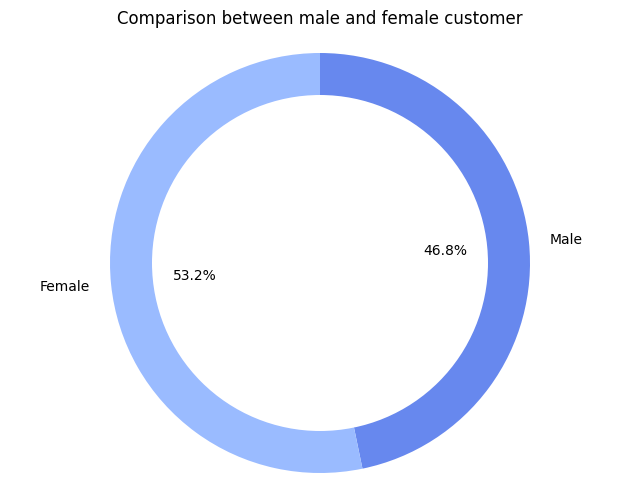

In [65]:
plt.figure(figsize=(8,6))
plt.pie(gender['count'],
        labels = gender['payCardSex'],
        autopct='%.1f%%',
        counterclock=False,
        startangle=90)
fig = plt.gcf()
center_circle = plt.Circle((0,0), 0.80, fc='white')
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.title('Comparison between male and female customer')
plt.show()

From the pie chart above, we can see that the difference between male and female in Transjakarta are not wide. Female proportion are only 6.4% bigger than the male. 

## Transjakarta customer generation

Group customer based on their generation based on their birth year

- Pre Boomer : birth year < 1945
- Baby Boomer : 1945 >= birth year < 1965
- Generation X : 1965 >= birth year < 1981
- Generation Y : 1981>=  birth year < 1997
- Generation Z : 1997 >= birth year < 2013
- Generation Alpha : birth year >= 2013

In [66]:
def generation(x):
        if x <= 1945:
            return 'Pre Boomer'
        elif x >= 1945 and x < 1965:
            return 'Baby Boomer'
        elif x >=1965 and x < 1981:
            return 'Generation X'
        elif x >= 1981 and x < 1997:
            return 'Generation Y'
        elif x >= 1997 and x < 2013:
            return 'Generation Z'
        else:
            return 'generation Alpha'
df['generation'] = df['payCardBirthDate'].apply(generation)

Because of one person can own several card of payment type, I use name and birth date as the unique ID

In [67]:
df_name = df.groupby(['payCardName','payCardBirthDate','payCardBank','generation']).agg({'transID' : 'count'}).reset_index()
df_name.head()

,payCardName,payCardBirthDate,payCardBank,generation,transID
0,Abyasa Haryanti,1948,dki,Baby Boomer,39
1,Ade Astuti,2004,flazz,Generation Z,40
2,Ade Halimah,1982,dki,Generation Y,4
3,Ade Halimah,1993,dki,Generation Y,14
4,Ade Suryono,1995,flazz,Generation Y,4


In [68]:
generation = pd.crosstab(index=df_name['generation'], columns='count').reset_index().sort_values(by ='count', ascending=False)
generation

col_0,generation,count
2,Generation Y,942
3,Generation Z,642
1,Generation X,349
0,Baby Boomer,48


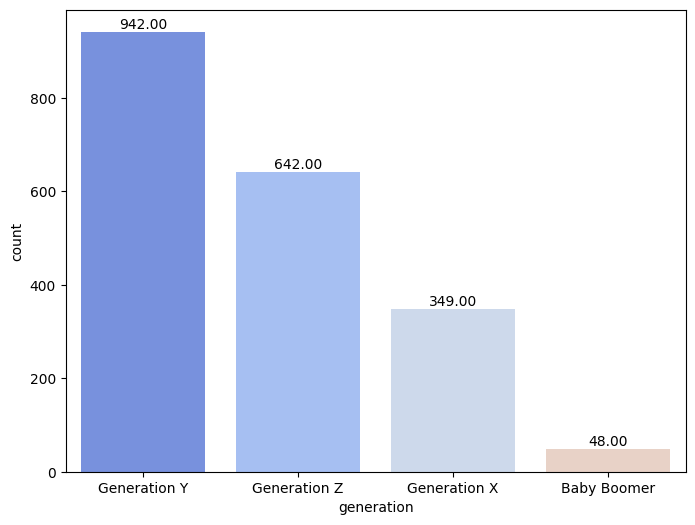

In [69]:
plt.figure(figsize= (8,6))
plots = sns.barplot(data = generation, x = 'generation', y ='count')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height() + 1), ha = 'center', va = 'center',
                   size = 10, xytext=(0,5),
                   textcoords = 'offset points')

Generation Y is dominating in the month of April it's because that most of the generation Y now in their working age, they will commute more than others. Generation Z now should be in their learning time ranging probably using Transjakarta as their choosen mode of transportation to go to their schools or university. 

Transjakarta custome are dominated by generation y and z. As of today, gen y and z are in their most productive time. Most of them will commute either for go to school or work. While for generation x and baby boomer, more likely their already planned for their retirement or maybe already retire, they tend to commute to work.

## Payment Type

In [70]:
payment_type = pd.crosstab(index = df['payCardBank'], columns = 'count').reset_index().sort_values(by='count', ascending=True)
payment_type

col_0,payCardBank,count
0,bni,2558
5,online,2751
4,flazz,3092
1,brizzi,3366
3,emoney,6581
2,dki,17862


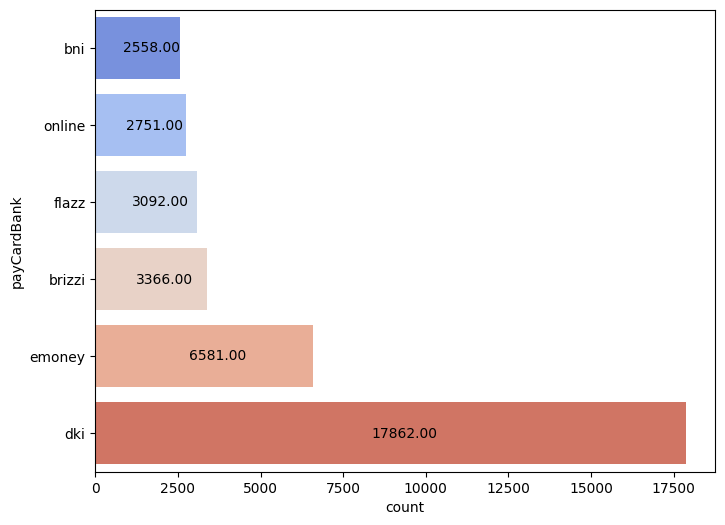

In [71]:
plt.figure(figsize= (8,6))
plots = sns.barplot(data = payment_type, y = 'payCardBank', x ='count')

for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width()/2, bar.get_y() + bar.get_height() / 2),  
                   ha='center', va='center',
                   size=10, xytext=(10, 0), 
                   textcoords='offset points')

Not surprising DKI as the local bank of Jakarta will dominated the transaction options in Transjakarta with a total of 17.862 transaction just over a month. What intersting in here is the online payment. It turns out Transjakarta have their own app called 'Tije'. In their app we can buy ticket and check for schedule.

## Average spend based on the generation

In [72]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInLatLon,tapOutLatLon,tapInHour,generation
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,"-6.184631,106.84402","-6.203101,106.85715",5,Generation Z
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,"-6.2287,106.83302","-6.217152,106.81892",5,Generation Z
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,"-6.133132,106.81435","-6.133731,106.81475",5,Generation Y
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,"-6.195743,106.93526","-6.183068,106.93194",5,Generation X
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,"-6.14965,106.889","-6.135355,106.81143",6,Generation Y


In [73]:
card_ownership = df.groupby(['payCardName']).agg({'payCardID' : pd.Series.nunique}).reset_index()
card_ownership[card_ownership['payCardID'] >1]

,payCardName,payCardID
2,Ade Halimah,2
212,Cengkal Lestari,2
534,Fathonah Saefullah,2
1025,Leo Wastuti,2
1415,Rahayu Prabowo,2
1546,Suci Hutagalung,2
1549,Suci Wacana,2


In [74]:
df_name_gen_amt = df.groupby(['payCardName','payCardBirthDate', 'generation']).agg({'payAmount' : 'sum'}).reset_index().sort_values(by='payAmount', ascending=False)
df_name_gen_amt.head()

,payCardName,payCardBirthDate,generation,payAmount
1055,Lutfan Hakim,2011,Generation Z,800000.0
1710,Tirta Siregar,1993,Generation Y,800000.0
535,Fathonah Permadi,1992,Generation Y,800000.0
69,Asirwada Marbun,1985,Generation Y,800000.0
161,"Cagak Maheswara, S.Sos",1992,Generation Y,800000.0


In [75]:
mean_amt = df_name_gen_amt.groupby('generation').agg({'payAmount' : 'mean'}).reset_index().sort_values(by = 'payAmount', ascending=False).rename({'payAmount' : 'Average Spend'}, axis =1)
mean_amt['Average Spend'] = mean_amt['Average Spend']/1000
mean_amt

,generation,Average Spend
2,Generation Y,80.104034
3,Generation Z,72.692368
1,Generation X,62.402579
0,Baby Boomer,56.916667


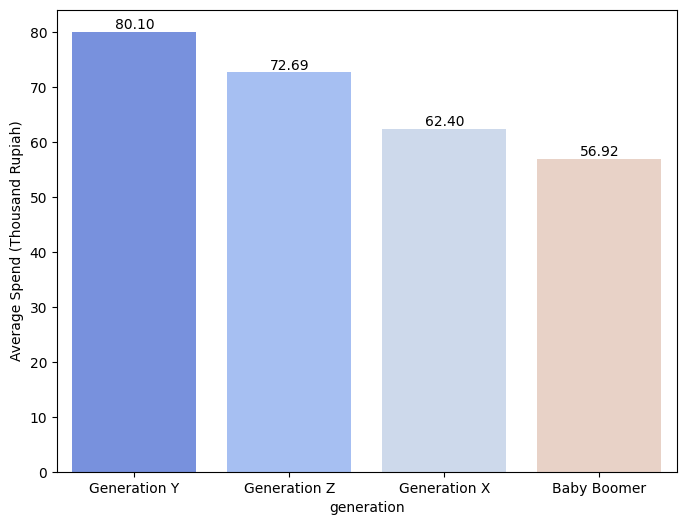

In [76]:
plt.figure(figsize= (8,6))
plots = sns.barplot(data = mean_amt, x = 'generation', y ='Average Spend')
plt.ylabel('Average Spend (Thousand Rupiah)')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()), ha = 'center', va = 'center',
                   size = 10, xytext=(0,5),
                   textcoords = 'offset points')

The amount spend for Transjakarta between each generation is not as much as it seem. The difference are only 10000 rupiah in each generation. The highest amount is by the generation y by spending 80 thousand rupiah a month.

## Combine Chart

In [77]:
import matplotlib.font_manager as fm

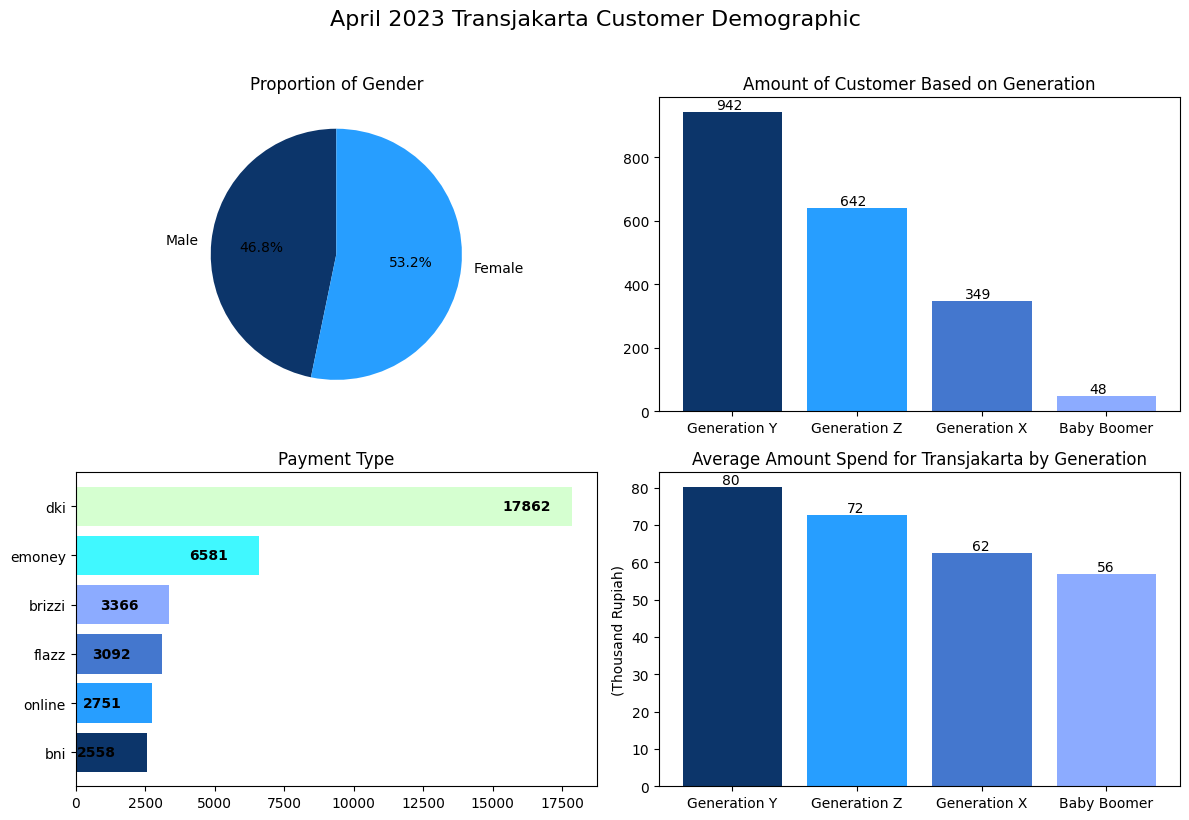

In [78]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Pie chart in ax[0][0]
color = ['#0C356A','#279EFF','#4477CE','#8CABFF','#40F8FF','#D5FFD0']
ax[0][0].pie(gender['count'],
          labels=gender['payCardSex'],
          autopct='%.1f%%',
          startangle=90,
          counterclock=True,
          colors= color, textprops = {'color' : 'black'})
ax[0][0].set_title('Proportion of Gender')

# Bar chart in ax[0][1]
bars = ax[0][1].bar(generation['generation'], generation['count'], color= color)
ax[0][1].set_title('Amount of Customer Based on Generation')

for bar in bars:
    yval = bar.get_height()
    ax[0][1].text(bar.get_x() + bar.get_width()/3, yval, int(yval), va='bottom')

# Bar chart in ax[1][0]
bars = ax[1][0].barh(payment_type['payCardBank'], payment_type['count'], color=color)
ax[1][0].set_title('Payment Type')

fontprops = fm.FontProperties(weight='bold')
for bar in bars:
    xval = bar.get_width()
    ax[1][0].text(xval - 2500, bar.get_y() + bar.get_height() / 2, str(xval), va='center', color='black', fontproperties=fontprops)
bars = ax[1][0].barh(payment_type['payCardBank'], payment_type['count'], color=color)
ax[1][0].set_title('Payment Type')

# Bar chart in ax[1][1]
bars = ax[1][1].bar(mean_amt['generation'], mean_amt['Average Spend'], color= color)
ax[1][1].set_title('Average Amount Spend for Transjakarta by Generation')
plt.ylabel('(Thousand Rupiah)')

for bar in bars:
    yval = bar.get_height()
    ax[1][1].text(bar.get_x() + bar.get_width()/2.5, yval, int(yval), va='bottom')


fig.suptitle('April 2023 Transjakarta Customer Demographic', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Revenue by Day

In [79]:
df['date'] = df['tapInTime'].dt.day

In [80]:
revenue_day = df.groupby('date').agg({'payAmount' : 'sum'}).reset_index().sort_values(by='date')
revenue_day.head()

,date,payAmount
0,1,65500.0
1,2,23000.0
2,3,6251000.0
3,4,6287000.0
4,5,6176000.0


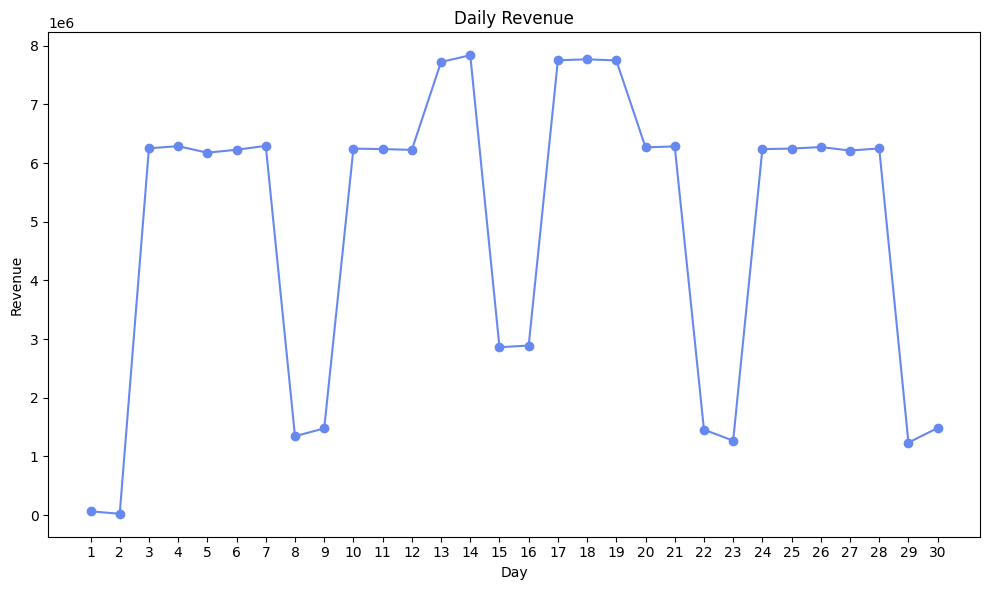

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(revenue_day['date'], revenue_day['payAmount'], marker='o')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.title('Daily Revenue')
plt.xticks(range(1, 31))
plt.tight_layout()
plt.show()


In [82]:
df['payAmount'].sum()

146637000.0

From the line chart we can see the flow of sales in the month of April 2023. There a strange pattern where for every 5 days there will be a significant drop for 2 days. If we check the calendar the 2 days are in the weekend. That's mean Transjakarta customer more likely to use Transjakarta in the weekday for go to school, working or just commuting around Jakarta.

## Payment Channel

In [284]:
payment_channel = df.groupby('payCardBank').agg({'payAmount' : 'sum'}).reset_index().rename({'payAmount' : 'Total'}, axis=1).sort_values(by = 'Total', ascending=False)
payment_channel['Total'] = payment_channel['Total']/1000000
payment_channel

,payCardBank,Total
2,dki,69.4605
3,emoney,28.2715
1,brizzi,15.7455
4,flazz,12.1735
5,online,11.0040
0,bni,9.9820


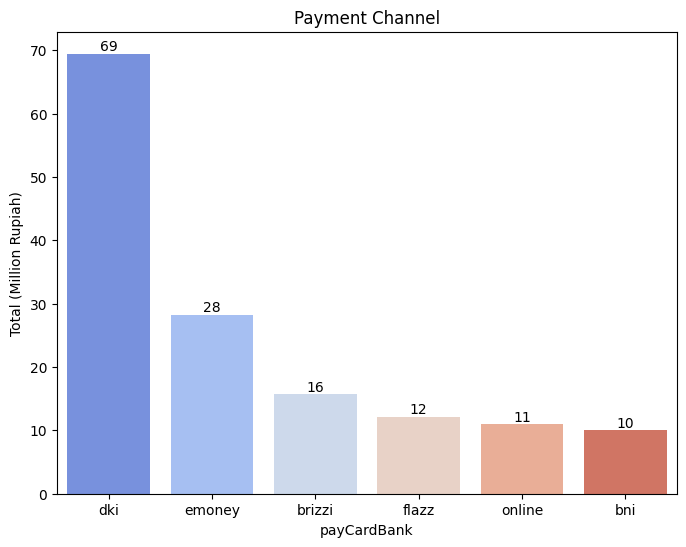

In [285]:
plt.figure(figsize= (8,6))
plots = sns.barplot(data = payment_channel, x = 'payCardBank', y ='Total', palette='coolwarm')
plt.title('Payment Channel')
plt.ylabel('Total (Million Rupiah)')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()), ha = 'center', va = 'center',
                   size = 10, xytext=(0,5),
                   textcoords = 'offset points')

As we can see from the earlier chart DKI is one of the favorite payment type. Based on the chart above, DKI distributing a total 69 million rupiah making it the highest other than payment type. Eventhough online is the least favorite as payment option it turn out it have the second biggest sales with a total of 28 million rupiah.

## Correlation between days and hour

In [286]:
df['day'] = df['tapInTime'].dt.day_name()

In [287]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInLatLon,tapOutLatLon,tapInHour,generation,date,day
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.85715,12.0,2023-04-03 06:00:53,3500.0,"-6.184631,106.84402","-6.203101,106.85715",5,Generation Z,3,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.81892,21.0,2023-04-03 06:40:01,3500.0,"-6.2287,106.83302","-6.217152,106.81892",5,Generation Z,3,Monday
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81475,39.0,2023-04-03 06:50:55,3500.0,"-6.133132,106.81435","-6.133731,106.81475",5,Generation Y,3,Monday
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93194,29.0,2023-04-03 06:28:16,3500.0,"-6.195743,106.93526","-6.183068,106.93194",5,Generation X,3,Monday
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.81143,15.0,2023-04-03 06:57:03,3500.0,"-6.14965,106.889","-6.135355,106.81143",6,Generation Y,3,Monday


In [288]:
day_sequence = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
day_hour = pd.crosstab(df['day'], df['tapInHour']).sort_index(key=lambda x: x.map(day_sequence))
day_hour

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
day,,,,,,,,,,,,,,,,,
Monday,595,1095,521,499,488,14,25,16,35,1,26,593,998,415,437,427,363
Tuesday,586,1085,520,491,496,16,26,28,20,2,28,585,1008,415,414,437,393
Wednesday,587,1067,477,513,514,28,26,31,17,1,31,604,1009,425,429,386,378
Thursday,613,1062,483,509,501,20,27,21,26,3,37,595,980,447,404,405,396
Friday,610,1074,480,519,510,22,28,23,26,1,34,617,994,410,436,424,374
Saturday,111,90,91,116,103,88,92,108,99,78,116,111,138,105,109,103,75
Sunday,102,96,108,114,93,97,101,98,113,80,114,99,117,97,117,128,71


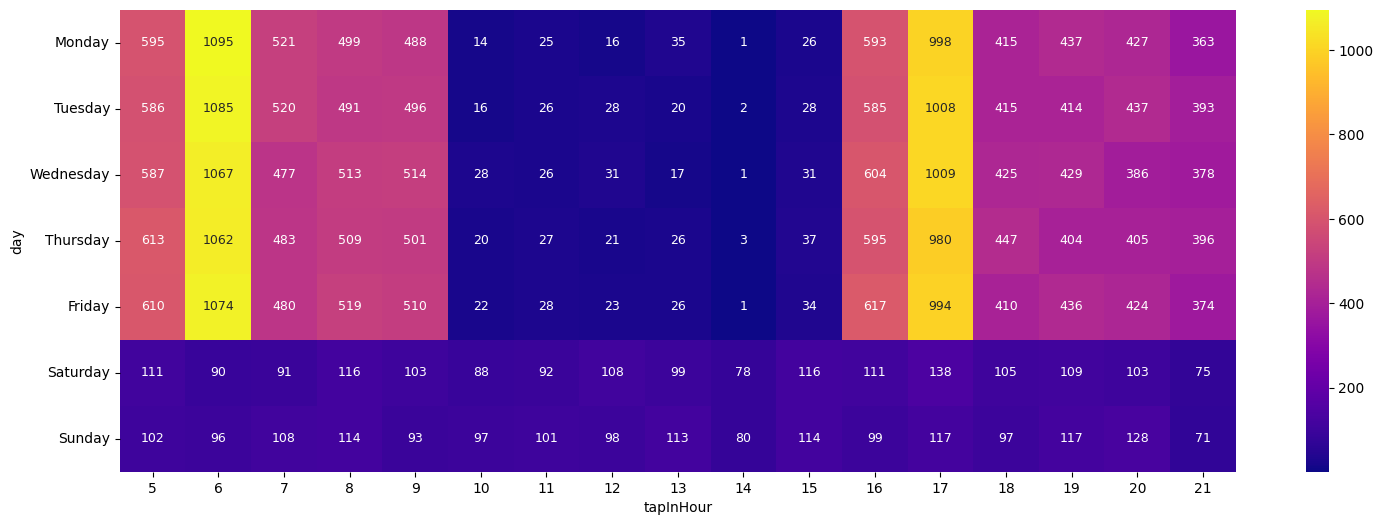

In [289]:
plt.figure(figsize=(18,6))
sns.heatmap(day_hour, annot=True, 
            annot_kws={'size':9}, fmt='.0f',
            cmap='plasma')
plt.show()

As we can see from the heatmap, the most frequent time is weekday at 6 where people go for and at 17 where people start to go home. For the weekend its distributed evenly between each hour. 

## Mapping tapInStops

In [290]:
import folium
from folium.plugins import HeatMap

coords = df[['tapInStopsLat','tapInStopsLon']].dropna()

m1 = folium.Map(location=[df["tapInStopsLat"].max(),df["tapInStopsLon"].min()],
                tiles = "Stamen Toner",
                zoom_start=12)
HeatMap(data=coords,radius=15, min_opacity=0.4).add_to(m1)
m1

Based on the heatmap most of the people start from the central Jakarta

## Mapping tapOutStops

In [291]:
import folium
from folium.plugins import HeatMap

coords = df[['tapOutStopsLat','tapOutStopsLon']].dropna()

m1 = folium.Map(location=[df["tapOutStopsLat"].max(),df["tapOutStopsLon"].min()],
                tiles = "Stamen Toner",
                zoom_start=12)
HeatMap(data=coords,radius=15, min_opacity=0.4).add_to(m1)
m1

Most of the people stops at central to south Jakarta where most of the offices is located there

## Most Frequent Route

In [292]:
df['route'] = df['tapInStopsName'].astype(str) + " - " + df['tapOutStopsName'].astype(str) 

In [293]:
route = pd.crosstab(index=df['route'], columns = 'count').reset_index().sort_values(by='count',ascending=False).head(10)
route

col_0,route,count
2874,Rusun Kapuk Muara - Penjaringan,125
2338,Penjaringan - Rusun Kapuk Muara,117
628,Garuda Taman Mini - BKN,100
413,Cibubur Junction - BKN,88
629,Garuda Taman Mini - Pinang Ranti,85
4081,Tanah Merdeka Arah Timur - Kampung Rambutan,84
3689,Simpang Danau Sunter Utara Barat - Jembatan Item,78
2889,Rusun Penjaringan - Penjaringan,69
2339,Penjaringan - Rusun Penjaringan,68
2329,Penggilingan - Rusun Komarudin,68


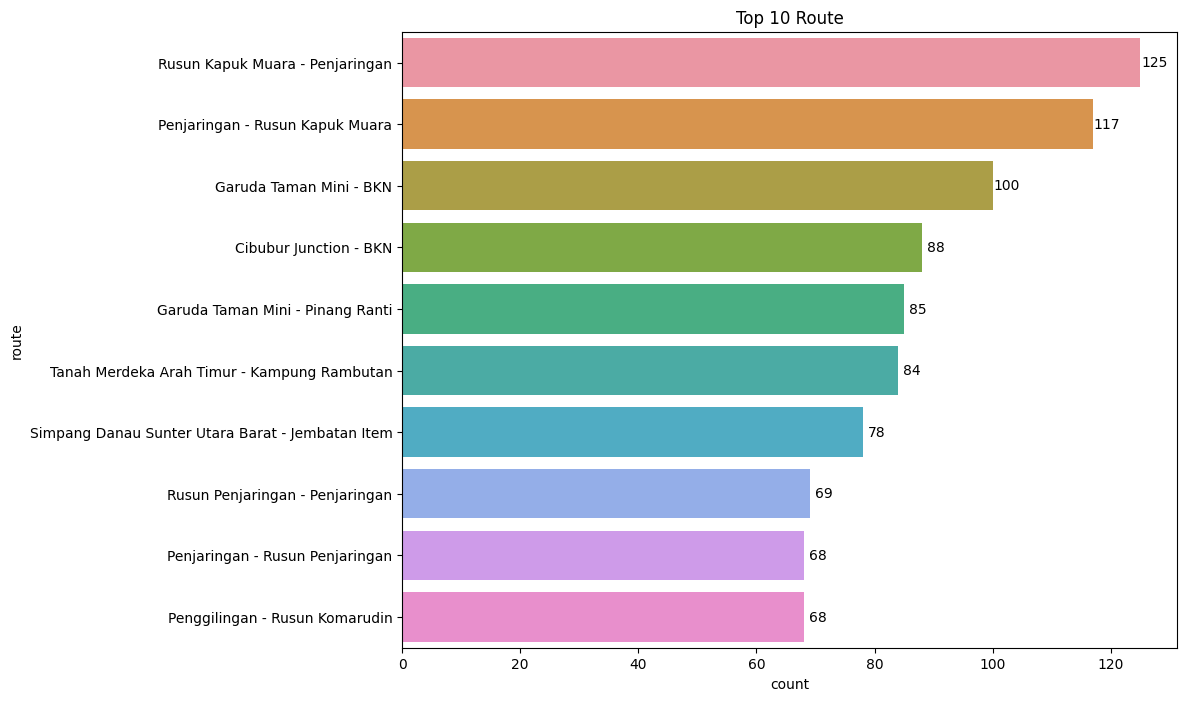

In [294]:
plt.figure(figsize = (10,8))
plots = sns.barplot(data = route,
            x = 'count',
            y= 'route',
            )
plt.title('Top 10 Route')
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2),  
                   ha='center', va='center',
                   size=10, xytext=(10, 0), 
                   textcoords='offset points')

plt.show()

# Conclusion

## Customer Demographic

1. Most of the customer are Female even tough there's not much of a different
2. By generation, there's 4 type of generation. Baby boomer, Gen X, Gen Y, and Gen Z.
3. Gen Y is the most generation. That's mean Transjakarta most of the customer are ranging between 26-42 years old. At that age most of the people should be working.
4. From 6 payment type, local bank of Jakarta is the most common to be use by their customer.
5. At average gen Y spend 80 thousand rupiah for commuting using Transjakarta/month.

## Sales 

1. In this dataset, in the month of April 2023 Transjakarta make 146 million rupiah. In which 69 million are come from local bank of Jakarta.
2. Based on the pattern, the sales are increasing in the week day, and decreasing significantly in the weekend. We can conclude that most of the the customer are commuting in the weekday, either for work, study, or anything else.

## Time and Route

1. The most crowded time for Transjakarta is in the weekday at 6 AM and 5 PM. Its the time where people go to work and go home.
2. Most of the people are ride the bus at central jakarta to south, where most of the office is. 
3. The route that most customer travel is rusun kapuk muara to penjaringan. Both of the stops is in North Jakarta

# Reccomendation

1. With most of the customer is from gen Y and Z, in which already more digitalized than the other generation, Transjakarta should maximize their online app and create new campaign. 
2. The new campign could implement what Starbucks did in their app, where they use point system. For every 1 trip that they travel they will get point, and when the point is at a certain point they can get free trip.
3. To counter the increasing of customer, Transjakarta can maximize their fleet by focusing on centrain stops at a certain times. For instance, in weekday at 6 AM and 5 PM, they can put more bus than the others around the office area, such as Central Jakarta. 
4. Since in the dataset the most use is a lot of them in North Jakarta, they can also put several more fleet in there.